# Advanced Machine Learning

## What will we learn in this class?

* Support Vector Machines
* Decision Trees 
* Random Forests
* Neural Networks


## Introduction

Now it will start getting interesting.  In this class we will explore a few more advanced machine learning methods. Also we will explore Neural Networks and we will introduce Python as a tool for Deep Learning. 


## Support Vector Machines

The SVM algorithmic paradigm tackles the sample complexity challenge by
searching for “large margin” separators. Roughly speaking, a halfspace separates
a training set with a large margin if all the examples are not only on the correct
side of the separating hyperplane but also far away from it. Restricting the
algorithm to output a large margin separator can yield a small sample complexity
even if the dimensionality of the feature space is high (and even infinite).


Which one of the bellow looks a better solution?

<img src="static/img/svm.jpg">


In a few words  a SVM machine will found the hyper plane that provide the greter margin of separability between classes. And the support vectors are the limits of this margin. 

The loss function of SVM is the following:

$$
J=\lambda||w||^2+\sum_i^n(1-y_i<x_i,w>)
$$


$\lambda$ is the regularization parameter, in Scikit-learn we will use $c=\frac{1}{/lambda}

lets look at the standard examples on scikit-learn


In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from sklearn.svm import SVC
from sklearn import datasets


iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

In [3]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
setosa_or_versicolor

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

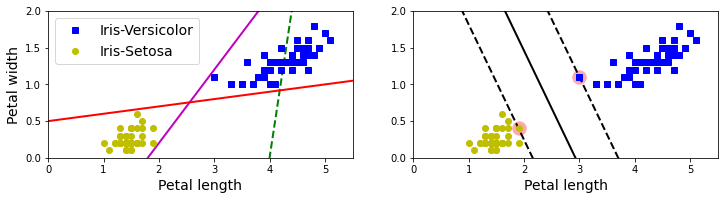

In [5]:


x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])


plt.show()

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ))

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [7]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline((
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ))
scaled_svm_clf2 = Pipeline((
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ))

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

/home/jose/anaconda3/envs/p_37_conda_deep_trading/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [8]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]


(4.0, 6.0, 0.8, 2.8)

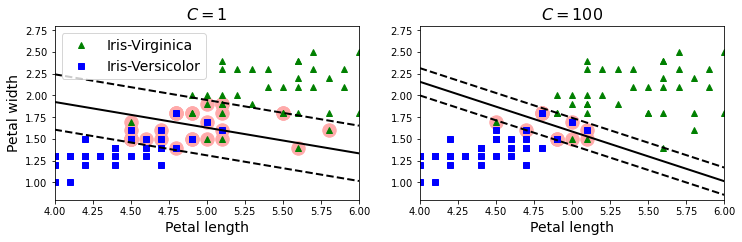

In [9]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])


So far we only saw  data that is linearly separated. SVM can work in datasets with different shapes. The maths behind will be left for the curious but lets look at an example


sources:

https://towardsdatascience.com/understanding-support-vector-machine-part-2-kernel-trick-mercers-theorem-e1e6848c6c4d

formal proof chapter 13 of MLTA

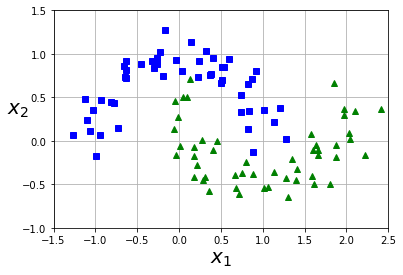

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [11]:

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline((
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ))

polynomial_svm_clf.fit(X, y)

/home/jose/anaconda3/envs/p_37_conda_deep_trading/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

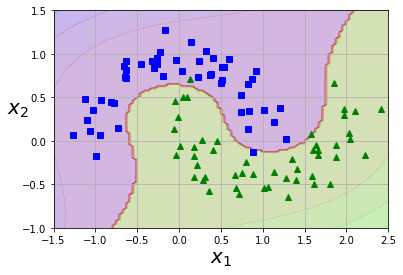

In [12]:

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])


plt.show()

### Random Trees

Random trees are one of the most important tools in machine learning, this is because they are the basis of one of the most powerful algorithms today called random forests. In this part of the course we will see how to visualize, design and train random trees.

A decision tree is a simple algorithm that essentially mimics a flowchart making them easy to interpret. A tree is composed out of the root-node, several tree-nodes and leaves. Essentially every node (including the root-node) splits the data set in subsets. Each split resembles an essential feature-specific question is a certain condition present or absent? Answering all those questions, until the bottom layer of the tree is reached, yields a prediction for the current sample. The leaves in this bottom layer are the last step in a decision tree and represent the predicted outcome.

source

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://towardsdatascience.com/demystifying-decision-trees-random-forests-gradient-boosting-20415b0a406f

In [13]:
#vamos a utilizar la base de datos de las hojas iris
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # deimsiones del petalo lenghtxwithd
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [14]:
from sklearn.tree import export_graphviz
from sklearn import tree
#vamos a crear un archivo dot, un archivo .dot es un formato que nos ayuda a crear multiples documentos con un formato similar
#utilizarmos la terminal para convertir el.dot en un jpg o png

tree.export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

In [15]:
import pydot
(graph,) = pydot.graph_from_dot_file('iris_tree.dot')
graph.write_png('iris_tree.png')

Lets see the tree

<img src="iris_tree.png">

## Ensemble methods

An ensemble is itself a supervised learning algorithm, because it can be trained and then used to make predictions. The trained ensemble, therefore, represents a single hypothesis. This hypothesis, however, is not necessarily contained within the hypothesis space of the models from which it is built. Thus, ensembles can be shown to have more flexibility in the functions they can represent. This flexibility can, in theory, enable them to over-fit the training data more than a single model would, but in practice, some ensemble techniques (especially bagging) tend to reduce problems related to over-fitting of the training data.

Empirically, ensembles tend to yield better results when there is a significant diversity among the models.[5][6] Many ensemble methods, therefore, seek to promote diversity among the models they combine.[7][8] Although perhaps non-intuitive, more random algorithms (like random decision trees) can be used to produce a stronger ensemble than very deliberate algorithms (like entropy-reducing decision trees).[9] Using a variety of strong learning algorithms, however, has been shown to be more effective than using techniques that attempt to dumb-down the models in order to promote diversity.[10] 

### Random Forest: Decision Tree Ensamble

Random forest is an ensamble of decision trees. in Scikit learn we can build ensambles with different classifiers. In the case of random forest we can use a class directly


sources:

https://en.wikipedia.org/wiki/Random_forest

## Neural Networks / Deep Learning

Deep Learning Slides and Keras

Lets try to improve our previous  prediction of misterious asset with Neural Networks

importing data: 100%|██████████| 12/12 [00:13<00:00,  1.15s/it]
/home/jose/anaconda3/envs/p_37_conda_deep_trading/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


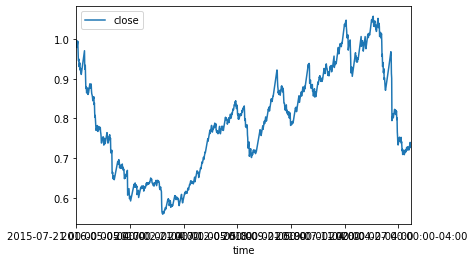

In [16]:
from solutions.utils import PortfolioModels
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

pm=PortfolioModels(data_repo="data/")
pm.all_closes.head()

X=pm.all_closes[[col for col in pm.all_closes.columns if "QQQ" not in col]]
y=pm.all_closes[[col for col in pm.all_closes.columns if "QQQ"  in col]]


def plot_results(X_test,y_test,regressor):
    
    re_build=pd.DataFrame((((X_test*regressor.coef_).sum(axis=1)+regressor.intercept_)+1).cumprod())
    re_build.columns=[regressor.__repr__()]

    ax=re_build.plot()
    (y_test+1).cumprod().plot(ax=ax)
    ax.set_title("MSE "+str(round(mean_squared_error(y_test.values,re_build.values),2)))
    
    print(regressor.coef_)

    
mistery_asset=pd.read_csv("data_cod/mistery_asset.csv",index_col="time")
mistery_asset.plot()

mistery_asset.columns=["mistery"]

mistery_asset.index=pd.to_datetime(mistery_asset.index,utc=True)
m_returns=np.log(mistery_asset).diff().dropna()
X=X.merge(m_returns,right_index=True,left_index=True,how="inner")
X=X[[col for col in X.columns if not "mistery" in col]]
X=np.log(X).diff().dropna()


y=m_returns.reindex(X.index)

X_train, X_test, y_train, y_test=train_test_split( X, y, test_size=0.33, random_state=42,
                                                 shuffle=False)



In [17]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras import backend as K 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

K.clear_session()

model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=[X_train.shape[1]],
                 kernel_regularizer=tf.keras.regularizers.L2(0.01),
                kernel_initializer='glorot_uniform',use_bias=True),
    
#       layers.Dense(16, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01),
#                   kernel_initializer='glorot_uniform',use_bias=True),

    layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.Adam(0.01)
# optimizer =  tf.keras.optimizers.SGD(lr=0.1, clipnorm=1.,momentum=.8)
model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae', 'mse'])



In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [19]:
EPOCHS = 400

scaler=StandardScaler() 
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

scaler_y=StandardScaler()
y_train_s=scaler_y.fit_transform(y_train)
y_test_s=scaler_y.transform(y_test)
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)


history = model.fit(
  X_train_s, y_train.values,
  epochs=EPOCHS, validation_data=(X_test_s,y_test.values), verbose=1,batch_size=256,
  callbacks=[early_stop])


Epoch 1/400
4/4 [==============================] - 0s 36ms/step - loss: 1.0070 - mae: 0.6660 - mse: 0.8793 - val_loss: 1.4032 - val_mae: 0.6406 - val_mse: 1.2800
Epoch 2/400
4/4 [==============================] - 0s 7ms/step - loss: 0.5087 - mae: 0.4308 - mse: 0.3874 - val_loss: 0.7055 - val_mae: 0.4746 - val_mse: 0.5886
Epoch 3/400
4/4 [==============================] - 0s 6ms/step - loss: 0.3303 - mae: 0.3475 - mse: 0.2153 - val_loss: 0.4720 - val_mae: 0.3712 - val_mse: 0.3615
Epoch 4/400
4/4 [==============================] - 0s 4ms/step - loss: 0.2309 - mae: 0.2642 - mse: 0.1221 - val_loss: 0.2927 - val_mae: 0.2706 - val_mse: 0.1881
Epoch 5/400
4/4 [==============================] - 0s 4ms/step - loss: 0.1857 - mae: 0.2119 - mse: 0.0827 - val_loss: 0.2388 - val_mae: 0.2424 - val_mse: 0.1396
Epoch 6/400
4/4 [==============================] - 0s 4ms/step - loss: 0.1676 - mae: 0.1918 - mse: 0.0699 - val_loss: 0.2159 - val_mae: 0.2350 - val_mse: 0.1220
Epoch 7/400
4/4 [================

4/4 [==============================] - 0s 5ms/step - loss: 5.3558e-04 - mae: 0.0064 - mse: 7.2316e-05 - val_loss: 9.3431e-04 - val_mae: 0.0101 - val_mse: 4.8815e-04
Epoch 100/400
4/4 [==============================] - 0s 6ms/step - loss: 5.1089e-04 - mae: 0.0065 - mse: 7.1509e-05 - val_loss: 8.9203e-04 - val_mae: 0.0102 - val_mse: 4.6879e-04
Epoch 101/400
4/4 [==============================] - 0s 4ms/step - loss: 4.8785e-04 - mae: 0.0065 - mse: 7.0951e-05 - val_loss: 8.5560e-04 - val_mae: 0.0101 - val_mse: 4.5405e-04
Epoch 102/400
4/4 [==============================] - 0s 7ms/step - loss: 4.6582e-04 - mae: 0.0064 - mse: 7.0395e-05 - val_loss: 8.2735e-04 - val_mae: 0.0099 - val_mse: 4.4662e-04
Epoch 103/400
4/4 [==============================] - 0s 4ms/step - loss: 4.4522e-04 - mae: 0.0064 - mse: 7.0359e-05 - val_loss: 7.9530e-04 - val_mae: 0.0097 - val_mse: 4.3418e-04
Epoch 104/400
4/4 [==============================] - 0s 7ms/step - loss: 4.2555e-04 - mae: 0.0063 - mse: 6.9683e-05 - v

Epoch 145/400
4/4 [==============================] - 0s 3ms/step - loss: 1.2042e-04 - mae: 0.0060 - mse: 6.4766e-05 - val_loss: 1.8676e-04 - val_mae: 0.0078 - val_mse: 1.3199e-04
Epoch 146/400
4/4 [==============================] - 0s 8ms/step - loss: 1.1929e-04 - mae: 0.0062 - mse: 6.4772e-05 - val_loss: 1.8074e-04 - val_mae: 0.0080 - val_mse: 1.2705e-04
Epoch 147/400
4/4 [==============================] - 0s 5ms/step - loss: 1.1657e-04 - mae: 0.0061 - mse: 6.3310e-05 - val_loss: 1.9119e-04 - val_mae: 0.0080 - val_mse: 1.3911e-04
Epoch 148/400
4/4 [==============================] - 0s 7ms/step - loss: 1.1556e-04 - mae: 0.0061 - mse: 6.3926e-05 - val_loss: 1.7433e-04 - val_mae: 0.0076 - val_mse: 1.2395e-04
Epoch 149/400
4/4 [==============================] - 0s 6ms/step - loss: 1.1273e-04 - mae: 0.0060 - mse: 6.2940e-05 - val_loss: 1.6558e-04 - val_mae: 0.0076 - val_mse: 1.1706e-04
Epoch 150/400
4/4 [==============================] - 0s 8ms/step - loss: 1.1100e-04 - mae: 0.0060 - mse: 

Epoch 191/400
4/4 [==============================] - 0s 3ms/step - loss: 7.9104e-05 - mae: 0.0060 - mse: 6.0238e-05 - val_loss: 1.3610e-04 - val_mae: 0.0075 - val_mse: 1.1736e-04
Epoch 192/400
4/4 [==============================] - 0s 4ms/step - loss: 7.8867e-05 - mae: 0.0059 - mse: 6.0032e-05 - val_loss: 1.4512e-04 - val_mae: 0.0076 - val_mse: 1.2628e-04
Epoch 193/400
4/4 [==============================] - 0s 7ms/step - loss: 7.9265e-05 - mae: 0.0059 - mse: 6.0260e-05 - val_loss: 1.3739e-04 - val_mae: 0.0074 - val_mse: 1.1830e-04
Epoch 194/400
4/4 [==============================] - 0s 8ms/step - loss: 7.8075e-05 - mae: 0.0057 - mse: 5.9031e-05 - val_loss: 1.3846e-04 - val_mae: 0.0073 - val_mse: 1.1931e-04
Epoch 195/400
4/4 [==============================] - 0s 6ms/step - loss: 7.7910e-05 - mae: 0.0058 - mse: 5.8685e-05 - val_loss: 1.3651e-04 - val_mae: 0.0074 - val_mse: 1.1696e-04
Epoch 196/400
4/4 [==============================] - 0s 7ms/step - loss: 7.7822e-05 - mae: 0.0058 - mse: 

Epoch 237/400
4/4 [==============================] - 0s 6ms/step - loss: 7.5926e-05 - mae: 0.0059 - mse: 5.9593e-05 - val_loss: 1.2440e-04 - val_mae: 0.0073 - val_mse: 1.0819e-04
Epoch 238/400
4/4 [==============================] - 0s 4ms/step - loss: 7.4686e-05 - mae: 0.0058 - mse: 5.8604e-05 - val_loss: 1.2487e-04 - val_mae: 0.0074 - val_mse: 1.0877e-04
Epoch 239/400
4/4 [==============================] - 0s 7ms/step - loss: 7.3735e-05 - mae: 0.0058 - mse: 5.7585e-05 - val_loss: 1.2486e-04 - val_mae: 0.0072 - val_mse: 1.0857e-04
Epoch 240/400
4/4 [==============================] - 0s 5ms/step - loss: 7.3943e-05 - mae: 0.0057 - mse: 5.7653e-05 - val_loss: 1.2434e-04 - val_mae: 0.0072 - val_mse: 1.0800e-04
Epoch 241/400
4/4 [==============================] - 0s 4ms/step - loss: 7.3820e-05 - mae: 0.0058 - mse: 5.7511e-05 - val_loss: 1.2452e-04 - val_mae: 0.0073 - val_mse: 1.0845e-04
Epoch 242/400
4/4 [==============================] - 0s 4ms/step - loss: 7.3892e-05 - mae: 0.0058 - mse: 

Epoch 283/400
4/4 [==============================] - 0s 7ms/step - loss: 7.2642e-05 - mae: 0.0056 - mse: 5.8349e-05 - val_loss: 1.1546e-04 - val_mae: 0.0069 - val_mse: 1.0141e-04
Epoch 284/400
4/4 [==============================] - 0s 7ms/step - loss: 7.1991e-05 - mae: 0.0057 - mse: 5.7931e-05 - val_loss: 1.2087e-04 - val_mae: 0.0073 - val_mse: 1.0693e-04
Epoch 285/400
4/4 [==============================] - 0s 4ms/step - loss: 7.2727e-05 - mae: 0.0058 - mse: 5.8953e-05 - val_loss: 1.2087e-04 - val_mae: 0.0073 - val_mse: 1.0712e-04
Epoch 286/400
4/4 [==============================] - 0s 3ms/step - loss: 7.3862e-05 - mae: 0.0060 - mse: 5.9842e-05 - val_loss: 1.2241e-04 - val_mae: 0.0074 - val_mse: 1.0856e-04
Epoch 287/400
4/4 [==============================] - 0s 4ms/step - loss: 7.2694e-05 - mae: 0.0057 - mse: 5.8990e-05 - val_loss: 1.1842e-04 - val_mae: 0.0070 - val_mse: 1.0487e-04
Epoch 288/400
4/4 [==============================] - 0s 3ms/step - loss: 7.2333e-05 - mae: 0.0057 - mse: 

Epoch 329/400
4/4 [==============================] - 0s 8ms/step - loss: 7.1191e-05 - mae: 0.0058 - mse: 5.7685e-05 - val_loss: 1.2151e-04 - val_mae: 0.0073 - val_mse: 1.0737e-04
Epoch 330/400
4/4 [==============================] - 0s 5ms/step - loss: 7.2294e-05 - mae: 0.0058 - mse: 5.8039e-05 - val_loss: 1.1575e-04 - val_mae: 0.0070 - val_mse: 1.0145e-04
Epoch 331/400
4/4 [==============================] - 0s 7ms/step - loss: 7.1670e-05 - mae: 0.0058 - mse: 5.7425e-05 - val_loss: 1.1688e-04 - val_mae: 0.0071 - val_mse: 1.0316e-04
Epoch 332/400
4/4 [==============================] - 0s 8ms/step - loss: 7.1061e-05 - mae: 0.0058 - mse: 5.7399e-05 - val_loss: 1.1612e-04 - val_mae: 0.0072 - val_mse: 1.0288e-04
Epoch 333/400
4/4 [==============================] - 0s 7ms/step - loss: 7.2315e-05 - mae: 0.0058 - mse: 5.9225e-05 - val_loss: 1.1488e-04 - val_mae: 0.0071 - val_mse: 1.0190e-04
Epoch 334/400
4/4 [==============================] - 0s 8ms/step - loss: 7.1460e-05 - mae: 0.0058 - mse: 

Epoch 375/400
4/4 [==============================] - 0s 5ms/step - loss: 6.9232e-05 - mae: 0.0056 - mse: 5.7768e-05 - val_loss: 1.1443e-04 - val_mae: 0.0070 - val_mse: 1.0284e-04
Epoch 376/400
4/4 [==============================] - 0s 4ms/step - loss: 6.9278e-05 - mae: 0.0055 - mse: 5.7643e-05 - val_loss: 1.1500e-04 - val_mae: 0.0069 - val_mse: 1.0348e-04
Epoch 377/400
4/4 [==============================] - 0s 4ms/step - loss: 7.0199e-05 - mae: 0.0055 - mse: 5.8655e-05 - val_loss: 1.1283e-04 - val_mae: 0.0069 - val_mse: 1.0122e-04
Epoch 378/400
4/4 [==============================] - 0s 3ms/step - loss: 6.9766e-05 - mae: 0.0055 - mse: 5.8214e-05 - val_loss: 1.0930e-04 - val_mae: 0.0066 - val_mse: 9.7947e-05
Epoch 379/400
4/4 [==============================] - 0s 7ms/step - loss: 7.1256e-05 - mae: 0.0057 - mse: 5.9684e-05 - val_loss: 1.2024e-04 - val_mae: 0.0074 - val_mse: 1.0806e-04
Epoch 380/400
4/4 [==============================] - 0s 4ms/step - loss: 7.1602e-05 - mae: 0.0058 - mse: 

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


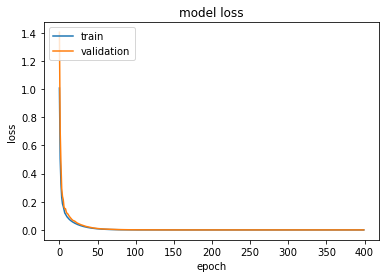

In [20]:
print(history.history.keys())
# #  "Accuracy"
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

/home/jose/anaconda3/envs/p_37_conda_deep_trading/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/home/jose/anaconda3/envs/p_37_conda_deep_trading/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


Text(0.5, 1.0, 'MSE0.0')

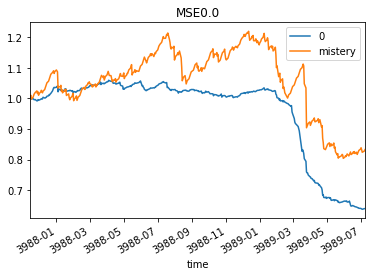

In [21]:
from sklearn.metrics import mean_squared_error
ax=pd.DataFrame((model.predict(X_test_s))+1,index=y_test.index).cumprod().plot()
(y_test+1).cumprod().plot(ax=ax)
ax.set_title("MSE"+ str(round(mean_squared_error(y_test.values,model.predict(X_test_s)),2)))

/home/jose/anaconda3/envs/p_37_conda_deep_trading/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/home/jose/anaconda3/envs/p_37_conda_deep_trading/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='time'>

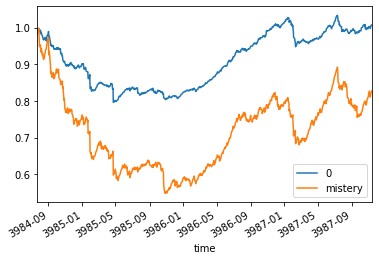

In [22]:
ax=pd.DataFrame((model.predict(X_train_s))+1,index=y_train.index).cumprod().plot()
(y_train+1).cumprod().plot(ax=ax)

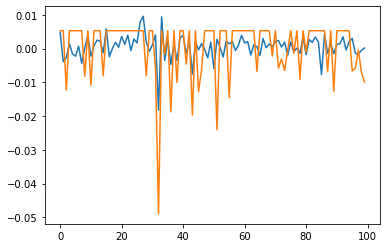

In [23]:
plt.plot(model.predict(X_test_s)[:100])
plt.plot(y_test.values[:100])

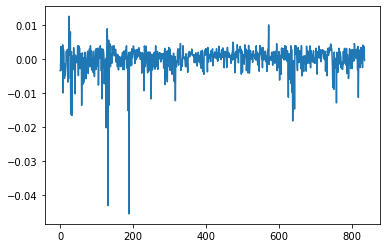

In [24]:
plt.plot(model.predict(X_train_s))


/home/jose/anaconda3/envs/p_37_conda_deep_trading/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


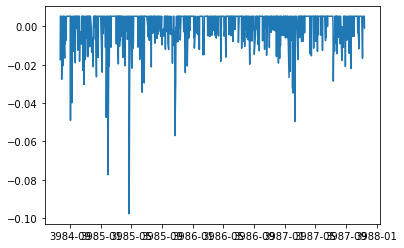

In [25]:
plt.plot(y_train)

# Homework


1. Build a class that fits a regression to the mistery asset using SVM, Decision Trees and Random Forest.
2. Add visualization function to the class
3. Refactor the neural network model so can be fitted wiht only one method in the class


4. Install docker if you have windows follow : https://docs.docker.com/docker-for-windows/install/

sources:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html


In [ ]:
class NonLinearRegression:

    def plot_trees(self,X,y,regrresor):
    

    def plot_results(self,X_test,y_test,regressor):
     


    def fit(self,X_train,y_train,X_test,y_test,method="DecisionTreeRegressor"):

        if method=="DecisionTreeRegressor":
       
        elif method== "SVM":
 

        elif method == "RandomForestRegressor":


 

/home/jose/anaconda3/envs/p_37_conda_deep_trading/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/home/jose/anaconda3/envs/p_37_conda_deep_trading/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


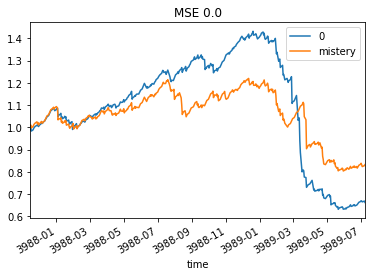

/home/jose/anaconda3/envs/p_37_conda_deep_trading/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/home/jose/anaconda3/envs/p_37_conda_deep_trading/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


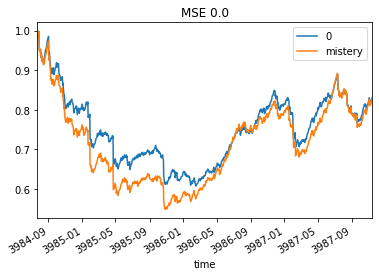

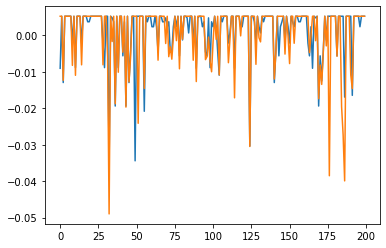

/home/jose/anaconda3/envs/p_37_conda_deep_trading/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/jose/anaconda3/envs/p_37_conda_deep_trading/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVR(C=5000, max_iter=1000)

/home/jose/anaconda3/envs/p_37_conda_deep_trading/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/home/jose/anaconda3/envs/p_37_conda_deep_trading/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


0.00013393642107199848

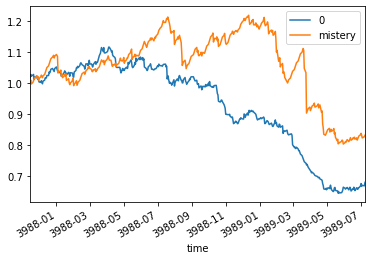

/home/jose/anaconda3/envs/p_37_conda_deep_trading/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/home/jose/anaconda3/envs/p_37_conda_deep_trading/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='time'>

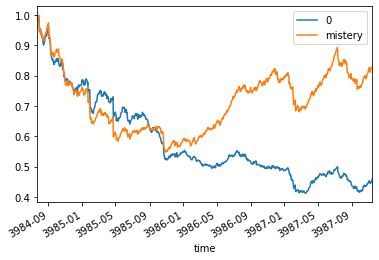

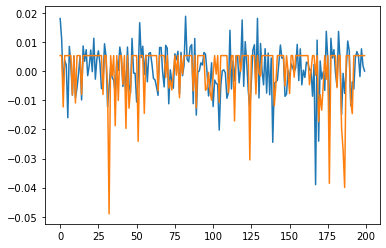

/home/jose/anaconda3/envs/p_37_conda_deep_trading/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/home/jose/anaconda3/envs/p_37_conda_deep_trading/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/home/jose/anaconda3/envs/p_37_conda_deep_trading/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


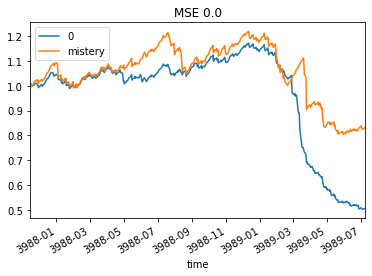

/home/jose/anaconda3/envs/p_37_conda_deep_trading/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/home/jose/anaconda3/envs/p_37_conda_deep_trading/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


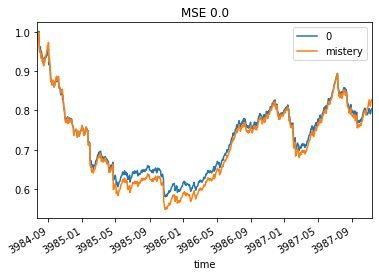

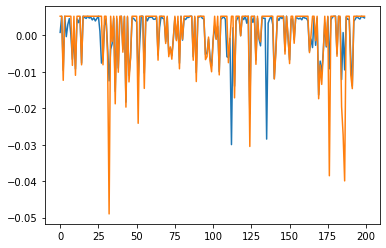